In this data cleaning exercise, i shall be focusing on the following processes;
1) Checking number of columns
2) Changing mispelt column names to the correct names.
3) Checking for missing values
4) Checking for duplicate values
5) Checking for outliers.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\CHIDIEBERE NNAMANI\\Documents\\DataScienceProjects\\Data Cleaning and Prediction on Diabetes\\diabetes_unclean.csv")

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
# Lets check the columns again
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [12]:
# The "No_Pation" column seem to spelt wrongly, so I will change the column name to "Patient_No"
df.rename(columns={'No_Pation':'Patient_No'}, inplace=True)

In [13]:
df.head()

,ID,Patient_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [17]:
# To check the columns that contains null values in the dataset
df.isnull().sum()

ID            0
Patient_No    0
Gender        0
AGE           1
Urea          1
Cr            2
HbA1c         3
Chol          2
TG            2
HDL           1
LDL           2
VLDL          1
BMI           0
CLASS         0
dtype: int64

In [18]:
# Since "HbA1c" column is having the highest cells with null values, 
# I find the mean value of the column

mean_value = df['HbA1c'].mean()
#print(mean_value)

# Then simply replace the null values with the mean values
df['HbA1c'].fillna(mean_value, inplace=True)

In [19]:
# Checking to ensure the column 'HbA1c' has been filled

df.isnull().sum()

ID            0
Patient_No    0
Gender        0
AGE           1
Urea          1
Cr            2
HbA1c         0
Chol          2
TG            2
HDL           1
LDL           2
VLDL          1
BMI           0
CLASS         0
dtype: int64

In [20]:
# Since there are few null values in the columns, I simply drop them.
# They are almost negligible, considering the size of the data. 

df1 = df.dropna()
df1.isnull().sum()

ID            0
Patient_No    0
Gender        0
AGE           0
Urea          0
Cr            0
HbA1c         0
Chol          0
TG            0
HDL           0
LDL           0
VLDL          0
BMI           0
CLASS         0
dtype: int64

In [21]:
# Checking for necessary information about the data

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          997 non-null    int64  
 1   Patient_No  997 non-null    int64  
 2   Gender      997 non-null    object 
 3   AGE         997 non-null    float64
 4   Urea        997 non-null    float64
 5   Cr          997 non-null    float64
 6   HbA1c       997 non-null    float64
 7   Chol        997 non-null    float64
 8   TG          997 non-null    float64
 9   HDL         997 non-null    float64
 10  LDL         997 non-null    float64
 11  VLDL        997 non-null    float64
 12  BMI         997 non-null    float64
 13  CLASS       997 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 109.0+ KB


In [22]:
# To get the count of samples in the "CLASS" column
df1.groupby('CLASS')['CLASS'].agg('count')

CLASS
N     102
N       1
P      53
Y     832
Y       9
Name: CLASS, dtype: int64

In [23]:
# To check for the unique values in the column "CLASS"
df1["CLASS"].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [47]:
# There is need to change the 'N ' and 'Y ' samples to 'N' and 'Y'
df1["CLASS"]=df1["CLASS"].str.replace("Y ", "Y")
df1["CLASS"]=df1["CLASS"].str.replace("N ", "N")
# To confirm the change has been effected
df1["CLASS"].unique()

<ipython-input-47-87ea9479085a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"]=df1["CLASS"].str.replace("Y ", "Y")
<ipython-input-47-87ea9479085a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"]=df1["CLASS"].str.replace("N ", "N")


array(['N', 'P', 'Y'], dtype=object)

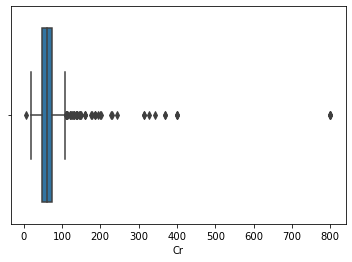

In [48]:
# Checking for outliers in the data
# I checked for outliers through all the columns and
# I discovered that it is only the columns "Cr" and
# "Urea".

sns.boxplot(df1["Cr"])

In [49]:
# I have to fill in values in the place of
# the outliers. Therefore I choose to use
# the maximum quantile of the column. 

max_Cr = df1['Cr'].quantile(0.995)
max_Cr

401.0

In [50]:
df1[df1['Cr']>max_Cr]

,ID,Patient_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [51]:
# Assigning the new data to a new variable

df2 = df1[df1['Cr']<max_Cr]

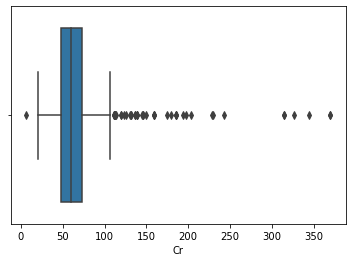

In [53]:
# To confirm the column "Cr" has been filled

sns.boxplot(df2['Cr'])

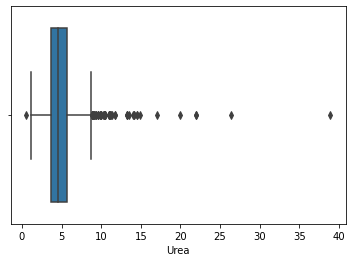

In [54]:
# Also checked for outliers in the "Urea" column

sns.boxplot(df2["Urea"])

In [55]:
# Also I find the maximum quantile for the column "Urea"

max_urea = df2["Urea"].quantile(0.995)
max_urea

17.259499999999857

In [56]:
# Effecting the change into the data

df2[df2["Urea"]>max_urea]

,ID,Patient_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
95,171,45434,M,40.0,22.0,159.0,5.4,3.1,1.6,1.1,1.3,0.7,24.0,N
369,374,24096,M,59.0,20.0,65.0,6.2,4.6,1.3,0.9,3.1,0.6,30.0,Y
533,216,34421,M,55.0,22.0,145.0,8.0,6.7,3.7,1.7,2.0,1.5,33.0,Y
884,46,9963,M,51.0,38.9,58.0,6.8,5.9,2.6,1.4,3.4,1.2,33.0,Y
892,55,2345,M,55.0,26.4,228.0,7.1,4.1,1.9,1.3,2.0,0.9,27.0,Y


In [57]:
# Assigning the new data to a new variable "df3"

df3 = df2[df2["Urea"]<max_urea]

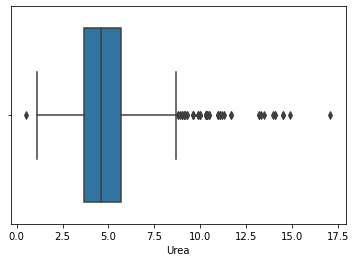

In [58]:
# Confirming the change in the column

sns.boxplot(df3["Urea"])

In [63]:
# Checking for duplicate values
df3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1002     True
1003     True
1005    False
1007    False
1008     True
Length: 985, dtype: bool

In [70]:
# Dropping duplicate values and assigning to a new dataframe
df4=df3.drop_duplicates()

In [71]:
# Confirming the change has been made
df4.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
997     False
998     False
1000    False
1005    False
1007    False
Length: 982, dtype: bool

In [72]:
# Writing the dataframe into a new csv file named "Cleaned_diabetes_data"
df4.to_csv('Cleaned_diabetes_data.csv')

This is the end of the data cleaning process on diabetes dataset.